In [2]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps

In [3]:
my_cols = [x for x in range(0,32)]
df = pd.read_csv('groceries.csv',names=my_cols, engine='python')
df_dummies = pd.get_dummies(df)
# df_dummies
# create new dataframe with union column same item
#df[~df[31].isnull()]
#df_dummies[df_dummies['31_candles']==1]
#df_dummies.add_suffix(columns[0])

In [4]:
# search all items
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)
len(columns)

166

In [26]:
# df_new.head(166)
# truncate dataframe at 166 columns
df_truncate = df_new.head(166)
sparse = csr_matrix(df_truncate)

# RCM algorithm fro df_tuncate
order = reverse_cuthill_mckee(sparse)

# print(columns[order.tolist()])
print(order)

# reorder name columns
columns = [ columns[i] for i in order]
#print(columns)

[127  90  94  74  46 162  84  80  18  25 138  43  83 161 165  89  35 136
 113  72  76  22 143  65   2 157  69  37 102  13   6 152 145  42 147  55
 115  88  26  15  91  36  16 140  68  27 128  71  73  56  47 100 124  48
  54 151 139  40  29 114  82 111  14  41  93   1 155  45 133  51  19  78
  81  96 112   0 106  58  34  62 137 101  64 130 132 129   8 107  98 116
  85  59   9  11  77 159 122 134 120 125  92  44 144  23   3 118  70 108
 121 126  61  57  39  12 149 156 148  86  79  50 109  99  30   5  67  95
  21 153  31 163 131  66  24 146 119  97 160  53  17  49 105   7   4 154
 110  33 150  60  52  38  20 158 117  63  32 135  10 164 141  75 142 104
  87 123 103  28]


In [27]:
# order RCM
df_truncate.iloc[order][order]

,liqueur,nut snack,ready soups,sparkling wine,frozen potato products,roll products,organic sausage,specialty chocolate,liver loaf,toilet cleaner,...,cream,nuts/prunes,cake bar,spices,softener,photo/film,cleaner,sauces,other vegetables,tidbits
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


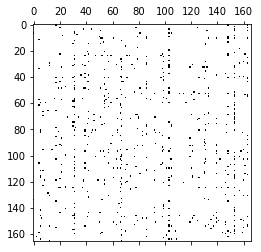

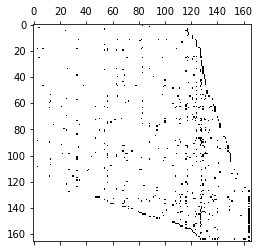

bw after RCM 107
bw first RCM 161


In [43]:
# example reorder
# print matrix sparse

plt.spy(df_truncate)
plt.show()

new_df = df_truncate.iloc[order][order]
plt.spy(new_df)
plt.show()

# print bandwith after rcm 
# nel datframe 166,166
[i,j]=np.where(df_truncate.loc[order][order] == 1)
bw = max(i-j) +1
print("bw after RCM " + str(bw))
[i,j]=np.where(df_truncate == 1)
bw = max(i-j) +1
print("bw first RCM " +str(bw))


df_new_complete without RCM


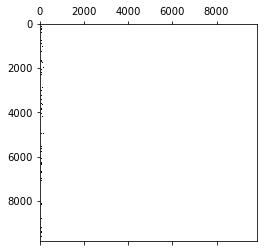

df_new_complete with RCM


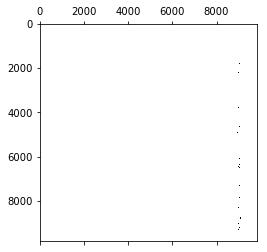

bw after RCM 8172
bw first RCM 9827


In [38]:
#DATAFRAME COMPLET --> matrix square

# df_truncate.to_csv("data.csv",header=False,index=False)
# aggiungiamo item fittizi per avere una matrice quadrata
# il problema è che aggiungengo troppi zeri si perde troppo utilità (NB gli item son 160)
# quindi 

zero_data_to_add = np.zeros(shape=(len(df_dummies),len(df_dummies)-len(columns)))
columns_to_add = [x for x in range(0,len(df_dummies)-len(columns))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')

# creo il dataset completo aggiungendo tutti gli zeri che mancano
df_new_complete = pd.concat([df_new, df_to_add], axis=1)
# rename all column name
df_new_complete.columns = [i for i in range(df_new_complete.shape[1])]
# for write in a file uncommented this line
# save dataset complete in 1000x1000
# df_new_complete.to_csv("data_complete.csv",header = False, index=False)

# compute RCM for matrix complete
sparse_complete = csr_matrix(df_new_complete)
# RCM algorithm fro df_tuncate
order_complete = reverse_cuthill_mckee(sparse_complete)

# print(df_new_complete)
# print(len(df_new_complete),len(order_complete))

print("df_new_complete without RCM")
plt.spy(df_new_complete)
plt.show()
print("df_new_complete with RCM")
plt.spy(df_new_complete.iloc[order_complete][order_complete])
plt.show()

[i,j] = np.where(df_new_complete.iloc[order_complete][order_complete] == 1)
bw = max(i-j) +1
print("bw after RCM " + str(bw))
[i,j] = np.where(df_new_complete == 1)
bw = max(i-j) +1
print("bw first RCM " +str(bw))
df_completed_reordered = df_new_complete.iloc[order_complete][order_complete]

9835

df_new_complete without RCM


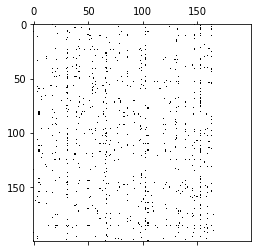

df_new_complete with RCM


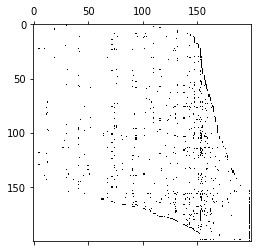

bw after RCM 132
bw first RCM 200


In [41]:
# DATAFRAME --> 200x200

# quindi riduciamo il tutto a 200 righe e 200 colonne
# dataframe ridemensionato
df_complete_200 = df_new_complete.iloc[:200,:200]
#df_complete_200.to_csv("data_complete_200.csv",header=False,index=False)
sparse_complete = csr_matrix(df_complete_200)
# RCM algorithm fro df_tuncate
order_complete = reverse_cuthill_mckee(sparse_complete)

print("df_new_complete without RCM")
plt.spy(df_complete_200)
plt.show()
print("df_new_complete with RCM")
plt.spy(df_complete_200.iloc[order_complete][order_complete])
plt.show()

[i,j] = np.where(df_complete_200.iloc[order_complete][order_complete] == 1)
bw = max(i-j) +1
print("bw after RCM " + str(bw))
[i,j] = np.where(df_complete_200 == 1)
bw = max(i-j) +1
print("bw first RCM " +str(bw))
df_completed_reordered = df_complete_200.iloc[order_complete][order_complete]

#print(df_complete_200.head())
#print(len(df_complete_200))
#print(len(df_complete_200.iloc[1]))
df_reordered = df_complete_200.iloc[order_complete][order_complete]

# df_complete_200.to_csv("data_complete_200.csv",header=False,index=False)
